# Module 2 Summative Lab

## Introduction

For today's section, we're going to work on a single big lab to apply everything we've learned in Module 2!

## About This Lab

A quick note before getting started--this lab isn't like other labs you seen so far. This lab is meant to take ~8 hours to complete, so it's much longer and more challenging that the average labs you've seen so far. If you feel like this lab is challenging or that you might be struggling a bit, don't fret--that's by design! With everything we've learned about Web Scraping, APIs, and Databases, the best way to test our knowledge of it is to build something substantial! 

## The Project

In this lab, we're going to make use of everything we've learned about APIs, databases, and Object-Oriented Programming to **_Extract, Transform, and Load_** (or **_ETL_**, for short) some data from a SQL database into a MongoDB Database. 

You'll find a database containing information about soccer teams and the matches they've played in the file `database.sqlite`. For this project, our goal is to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database. 

Let's get into the specifics of this project.

### The Goal

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this [kaggle page](https://www.kaggle.com/laudanum/footballdelphi).  Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database. 

Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
* The team's win percentage on days where it was raining during games in the 2011 season. 

#### Getting the Weather Data

Note that for this last calculation, you'll need to figure out if it was raining or not during the game. The database itself does not contain this information, but it does contain the date on which the game was played. For this, you'll need to use the [DarkSky API](https://darksky.net/dev) to get the historical weather data for that day. Note that each game is played in a different location, and this information is not contained in our SQL database. However, the teams in this database are largely german, so go ahead and just use the weather in Berlin, Germany as a proxy for this information. If it was raining in Berlin on the day the game was played, count that as rain game--**_you do not need to try and figure out the actual weather at each game's location, because we don't have that information!_**

#### NOTE: The DarkSky API is limited to 1000 free API calls a day, so be sure to test your model on very small samples. Otherwise, you'll hit the rate limit!

## Project Architecture

Unlike previous labs, this lab is more open-ended, and will require you to make design decisions and plan out your strategy for building a system with this many working parts. However, **_using Object-Oriented Programming is a requirement for this project--you must create at least 2 separate, well structured classes in your solution!_** Although it may seem easier to "just start coding", this is a classic beginner's mistake. Instead, think about separating out the different functionalities you'll need to reach your goal, and then build classes to handle each. For instance, at minimum, you'll need to:

* Query the SQL database
* Calculate summary statistics
* Get the weather data from the DarkSky API
* Load the data into MongoDB

We **_strongly recommend_** you consider creating separate classes for handling at least some of these of these tasks.  Be sure to plan the inputs, outputs, and methods for each class before you begin coding! 

**_NOTE:_** We have provided some empty classes below. You are welcome to delete them and use a different architecture for this project if you so choose.  You do not have to use each of them, they are just there to give you an idea of what you could sorts of classes you may want to consider using.

### Rapid Prototyping and Refactoring

It's totally okay to try to get a task working without using OOP. For instance, when experimenting with the DarkSky API for getting historical weather data, it makes sense to just write the code in the cells and rapidly iterate until you get it all working. However, once you get it working, you're not done--you should then **_Refactor_** your code into functions or classes to make your code more modular, reusable, understandable, and maintainable! 

In short--do what you need to do to get each separate piece of functionality working, and then refactor it into a class after you've figured it out!

### Some Final Advice

You haven't built anything this big or complex thus far, so you may not yet fully realize how much trial and error goes into it. If your code keeps breaking, resist the urge to get frustrated, and just keep working. Software development is an iterative process!  No one writes perfect code that works the first time for something this involved. You're going to run into _a lot_ of small errors in this project, right up until the point where it just works, and then you're done! However, you can reduce these errors by planning out your code, and thinking about how all of the pieces fit together before you begin coding. Once you have some basic understanding of how it all will work, then you'll know what you need to build, and then all that is left is to build it!

In short:

* Plan ahead--you'll thank yourself later!
* Errors and broken code aren't bad, they're normal. 
* Keep working, and stay confident--you can do this!

Good luck--we look forward to seeing your completed project!

# Table of contents

* [Outline](#Outline)
* [Make tables](#Make-tables)
* [Get weather](#Get-weather)
* [Stats](#Stats)
    * [Total goals](#Total-goals)
    * [Wins](#Wins)
    * [Rain win pct](#Rain-win-pct)
    * [Total number of losses](#Total-number-of-losses)
* [Histograms](#Histograms)
* [Mongo](#Mongo)

### Table: Matches

* Match_ID (int): unique ID per match  
* Div (str): identifies the division the match was played in (D1 = Bundesliga, D2 = Bundesliga 2, E0 = English Premier League)  
* Season (int): Season the match took place in (usually covering the period of August till May of the following year)  
* Date (str): Date of the match  
* HomeTeam (str): Name of the home team  
* AwayTeam (str): Name of the away team
* FTHG (int) (Full Time Home Goals): Number of goals scored by the home team
* FTAG (int) (Full Time Away Goals): Number of goals scored by the away team
* FTR (str) (Full Time Result): 3-way result of the match (H = Home Win, D = Draw, A = Away Win)

### Table: Teams

* Season (str): Football season for which the data is valid
* TeamName (str): Name of the team the data concerns
* KaderHome (str): Number of Players in the squad
* AvgAgeHome (str): Average age of players
* ForeignPlayersHome (str): Number of foreign players (non-German, non-English respectively) playing for the team
* OverallMarketValueHome (str): Overall market value of the team pre-season in EUR (based on data from transfermarkt.de)
* AvgMarketValueHome (str): Average market value (per player) of the team pre-season in EUR (based on data from transfermarkt.de)
* StadiumCapacity (str): Maximum stadium capacity of the team's home stadium

### Table: Unique Teams

* TeamName (str): Name of a team
* Unique_Team_ID (int): Unique identifier for each team

### Table: Teams_in_Matches

*  Match_ID (int): Unique match ID
* Unique_Team_ID (int): Unique team ID (This table is used to easily retrieve each match a given team has played in)

## Outline
* Get only info for 2011
* Get weather info for all game days (berlin as location for all games)
* Calculate total number of goals and total number of wins
* Calculate win pct on rainy days (just means if it rained at all that day)
* Make a hist of wins and losses
* Store that hist as an IMG and put it in the database
* Load the data into MongoDB  

[Return to contents](#Table-of-contents)

In [67]:
import time
import datetime

In [172]:
import json

In [74]:
import requests

In [2]:
import sqlite3
conn = sqlite3.Connection('database.sqlite')
c = conn.cursor()

In [3]:
import pandas as pd

In [282]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

### Make tables

In [6]:
c.execute('''select name from sqlite_master where type = 'table';''').fetchall()

[('sqlite_sequence',),
 ('Matches',),
 ('Teams_in_Matches',),
 ('Teams',),
 ('Unique_Teams',)]

In [27]:
tablesa = c.execute('''select name from sqlite_master where type = 'table' AND 
    name NOT LIKE 'sqlite_%';''').fetchall()
tablesa

[('Matches',), ('Teams_in_Matches',), ('Teams',), ('Unique_Teams',)]

In [28]:
tables = []
for table in tablesa:
    tables.append(table[0]) 

In [29]:
tables

['Matches', 'Teams_in_Matches', 'Teams', 'Unique_Teams']

In [37]:
query = 'select * from matches;'
c.execute(query)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]

Matches


In [38]:
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [70]:
matchesdf = df.loc[df['Season'] == 2011]
matchesdf.reset_index(inplace=True)
print (len(matchesdf))
matchesdf.head()

992


,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1091,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1092,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1093,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1094,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1095,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


[Return to contents](#Table-of-contents)

### Get weather

In [106]:
matchesdf.Date

0      2012-03-31
1      2011-12-11
2      2011-08-13
3      2011-11-27
4      2012-02-18
5      2012-01-20
6      2012-02-04
7      2012-04-21
8      2011-09-18
9      2011-10-23
10     2011-10-01
11     2012-03-03
12     2011-08-27
13     2012-03-17
14     2011-11-06
15     2012-05-05
16     2012-04-11
17     2011-08-27
18     2011-12-17
19     2012-02-18
20     2012-02-03
21     2011-08-13
22     2011-10-29
23     2012-01-22
24     2011-12-03
25     2012-04-14
26     2011-09-18
27     2012-03-25
28     2012-03-10
29     2012-04-07
          ...    
962    2012-04-28
963    2012-04-28
964    2012-04-28
965    2012-04-29
966    2012-04-29
967    2012-04-30
968    2012-05-01
969    2012-05-01
970    2012-05-02
971    2012-05-02
972    2012-05-05
973    2012-05-06
974    2012-05-06
975    2012-05-06
976    2012-05-06
977    2012-05-06
978    2012-05-06
979    2012-05-06
980    2012-05-07
981    2012-05-08
982    2012-05-13
983    2012-05-13
984    2012-05-13
985    2012-05-13
986    201

In [264]:
s = matchesdf.Date[15]
s

'2012-05-05'

In [265]:
date = int(str(time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())).split('.')[0])

In [266]:
date 

1336190400

In [267]:
base_url = 'https://api.darksky.net/forecast/b9523226a8bb03c346fdfe0c4cd8b86a/52.514456, 13.398062,'
var = '{}?exclude=currently,minutely,hourly,flags'.format(date)
url = ''.join([base_url,var])
url

'https://api.darksky.net/forecast/b9523226a8bb03c346fdfe0c4cd8b86a/52.514456, 13.398062,1336190400?exclude=currently,minutely,hourly,flags'

In [268]:
response = requests.get(url)

In [269]:
response.status_code

200

In [270]:
print(response.text)

{"latitude":52.514456,"longitude":13.398062,"timezone":"Europe/Berlin","daily":{"data":[{"time":1336168800,"summary":"Possible light rain until morning, starting again in the evening.","icon":"rain","sunriseTime":1336188462,"sunsetTime":1336243259,"moonPhase":0.49,"precipIntensity":0.0003,"precipIntensityMax":0.0033,"precipIntensityMaxTime":1336251600,"precipProbability":0.57,"precipType":"rain","temperatureHigh":55.82,"temperatureHighTime":1336197600,"temperatureLow":41.09,"temperatureLowTime":1336276800,"apparentTemperatureHigh":55.82,"apparentTemperatureHighTime":1336197600,"apparentTemperatureLow":37.22,"apparentTemperatureLowTime":1336276800,"dewPoint":44.43,"humidity":0.75,"windSpeed":5.98,"windGust":10.01,"windGustTime":1336230000,"windBearing":350,"cloudCover":0.75,"uvIndex":5,"uvIndexTime":1336215600,"visibility":5.973,"temperatureMin":43.63,"temperatureMinTime":1336255200,"temperatureMax":58.02,"temperatureMaxTime":1336168800,"apparentTemperatureMin":40.7,"apparentTemperature

In [128]:
dict(response.headers)

{'Date': 'Thu, 13 Jun 2019 17:52:19 GMT',
 'Content-Type': 'application/json; charset=utf-8',
 'Transfer-Encoding': 'chunked',
 'Connection': 'keep-alive',
 'X-Authentication-Time': '2ms',
 'Cache-Control': 'max-age=3600',
 'Expires': 'Thu, 13 Jun 2019 18:52:19 +0000',
 'X-Forecast-API-Calls': '10',
 'X-Content-Type-Options': 'nosniff',
 'X-Response-Time': '117.624ms',
 'Vary': 'Accept-Encoding',
 'Content-Encoding': 'gzip'}

In [161]:
type(response.text)

str

In [166]:
type(response.json)

method

In [176]:
response.encoding

'utf-8'

In [182]:
a = json.loads(response.text)

In [190]:
a.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'daily', 'offset'])

In [210]:
'rain' in a['daily']['data'][0]['summary'].split()

True

In [211]:
a['daily']['data'][0]['icon']

'rain'

In [249]:
testdf = matchesdf.loc[13:18]
testdf

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
13,1104,1105,D1,2011,2012-03-17,Hertha,Bayern Munich,0,6,A
14,1105,1106,D1,2011,2011-11-06,Augsburg,Bayern Munich,1,2,A
15,1106,1107,D1,2011,2012-05-05,FC Koln,Bayern Munich,1,4,A
16,1107,1108,D1,2011,2012-04-11,Dortmund,Bayern Munich,1,0,H
17,1108,1109,D1,2011,2011-08-27,Leverkusen,Dortmund,0,0,D
18,1109,1110,D1,2011,2011-12-17,Freiburg,Dortmund,1,4,A


In [246]:
testdf

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
13,1104,1105,D1,2011,2012-03-17,Hertha,Bayern Munich,0,6,A
14,1105,1106,D1,2011,2011-11-06,Augsburg,Bayern Munich,1,2,A
15,1106,1107,D1,2011,2012-05-05,FC Koln,Bayern Munich,1,4,A
16,1107,1108,D1,2011,2012-04-11,Dortmund,Bayern Munich,1,0,H
17,1108,1109,D1,2011,2011-08-27,Leverkusen,Dortmund,0,0,D
18,1109,1110,D1,2011,2011-12-17,Freiburg,Dortmund,1,4,A


In [261]:
class weather_getter():

    def get_weather(df):
        rain = []
        base_url = 'https://api.darksky.net/forecast/b9523226a8bb03c346fdfe0c4cd8b86a/52.514456, 13.398062,'
        for date in df.Date:
            s = date
            timestamp = int(str(time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())).split('.')[0])
            var = '{}?exclude=currently,minutely,hourly,flags'.format(timestamp)
            url = ''.join([base_url,var])
            response = requests.get(url)
            js = json.loads(response.text)
            rain.append('rain' in js['daily']['data'][0]['summary'].split())
        df['Rain'] = rain
        

In [258]:
weather = weather_getter()

In [262]:
weather_getter.get_weather(df=testdf)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [263]:
testdf

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Rain
13,1104,1105,D1,2011,2012-03-17,Hertha,Bayern Munich,0,6,A,False
14,1105,1106,D1,2011,2011-11-06,Augsburg,Bayern Munich,1,2,A,False
15,1106,1107,D1,2011,2012-05-05,FC Koln,Bayern Munich,1,4,A,True
16,1107,1108,D1,2011,2012-04-11,Dortmund,Bayern Munich,1,0,H,False
17,1108,1109,D1,2011,2011-08-27,Leverkusen,Dortmund,0,0,D,True
18,1109,1110,D1,2011,2011-12-17,Freiburg,Dortmund,1,4,A,True


In [386]:
weather_getter.get_weather(df=matchesdf)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [388]:
matchesdf.loc[10:20]

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Rain
10,1101,1102,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,D,False
11,1102,1103,D1,2011,2012-03-03,Leverkusen,Bayern Munich,2,0,H,False
12,1103,1104,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,True
13,1104,1105,D1,2011,2012-03-17,Hertha,Bayern Munich,0,6,A,False
14,1105,1106,D1,2011,2011-11-06,Augsburg,Bayern Munich,1,2,A,False
15,1106,1107,D1,2011,2012-05-05,FC Koln,Bayern Munich,1,4,A,True
16,1107,1108,D1,2011,2012-04-11,Dortmund,Bayern Munich,1,0,H,False
17,1108,1109,D1,2011,2011-08-27,Leverkusen,Dortmund,0,0,D,True
18,1109,1110,D1,2011,2011-12-17,Freiburg,Dortmund,1,4,A,True
19,1110,1111,D1,2011,2012-02-18,Hertha,Dortmund,0,1,A,False


[Return to contents](#Table-of-contents)

## Stats

### Total goals

In [271]:
matchesdf.head(1)

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1091,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A


In [280]:
matchesdf.HomeTeam.unique()

array(['Nurnberg', 'Stuttgart', 'Wolfsburg', 'Mainz', 'Freiburg',
       "M'gladbach", 'Hamburg', 'Werder Bremen', 'Schalke 04', 'Hannover',
       'Hoffenheim', 'Leverkusen', 'Kaiserslautern', 'Hertha', 'Augsburg',
       'FC Koln', 'Dortmund', 'Bayern Munich', 'Hansa Rostock', 'Bochum',
       'Ein Frankfurt', 'Paderborn', 'Greuther Furth',
       'Fortuna Dusseldorf', 'Ingolstadt', 'Cottbus', 'St Pauli',
       'Frankfurt FSV', 'Union Berlin', 'Munich 1860', 'Aachen',
       'Karlsruhe', 'Braunschweig', 'Erzgebirge Aue', 'Duisburg',
       'Dresden', 'Blackburn', 'Fulham', 'Liverpool', 'Newcastle', 'QPR',
       'Wigan', 'Stoke', 'West Brom', 'Man City', 'Arsenal',
       'Aston Villa', 'Chelsea', 'Everton', 'Sunderland', 'Swansea',
       'Bolton', 'Norwich', 'Wolves', 'Man United', 'Tottenham'],
      dtype=object)

In [281]:
matchesdf.AwayTeam.unique() == matchesdf.HomeTeam.unique()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [295]:
q = '''select HomeTeam from matchesdf order by 1'''
all_home = pysqldf(q)
q2 = '''select AwayTeam from matchesdf order by 1'''
all_away = pysqldf(q2)

In [296]:
all_home.HomeTeam.unique() == all_away.AwayTeam.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [299]:
teams = list(all_home.HomeTeam.unique())

In [534]:
final_df = pd.DataFrame()

In [535]:
final_df['Teams'] = teams

In [536]:
final_df.head()

,Teams
0,Aachen
1,Arsenal
2,Aston Villa
3,Augsburg
4,Bayern Munich


In [537]:
final_df['Total_home_goals'] = list(matchesdf.FTHG.groupby(matchesdf.HomeTeam).sum())

In [538]:
final_df.head()

,Teams,Total_home_goals
0,Aachen,15
1,Arsenal,39
2,Aston Villa,20
3,Augsburg,20
4,Bayern Munich,49


In [539]:
final_df['Total_away_goals'] = list(matchesdf.FTAG.groupby(matchesdf.AwayTeam).sum())

In [540]:
final_df.head()

,Teams,Total_home_goals,Total_away_goals
0,Aachen,15,15
1,Arsenal,39,35
2,Aston Villa,20,17
3,Augsburg,20,16
4,Bayern Munich,49,28


In [541]:
final_df['Total_goals'] = final_df['Total_home_goals'] + final_df['Total_away_goals']

In [542]:
final_df.head()

,Teams,Total_home_goals,Total_away_goals,Total_goals
0,Aachen,15,15,30
1,Arsenal,39,35,74
2,Aston Villa,20,17,37
3,Augsburg,20,16,36
4,Bayern Munich,49,28,77


[Return to contents](#Table-of-contents)

### Wins

In [364]:
matchesdf.head(1)

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1091,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A


In [532]:
matchesdf.FTR.groupby(matchesdf.AwayTeam).value_counts().head()

AwayTeam  FTR
Aachen    H      8
          D      7
          A      2
Arsenal   A      9
          H      7
Name: FTR, dtype: int64

In [531]:
matchesdf.FTR.groupby(matchesdf.HomeTeam).value_counts().head()

HomeTeam  FTR
Aachen    A       7
          D       6
          H       4
Arsenal   H      12
          D       4
Name: FTR, dtype: int64

In [543]:
q3 = '''select AwayTeam as Teams, count(FTR) as Total_away_wins from matchesdf where FTR = 'A' group by AwayTeam ;'''
all_away_wins = pysqldf(q3)
all_away_wins.head()

,Teams,Total_away_wins
0,Aachen,2
1,Arsenal,9
2,Aston Villa,3
3,Augsburg,2
4,Bayern Munich,9


In [544]:
q4 = '''select HomeTeam as Teams, count(FTR) as Total_home_wins from matchesdf where FTR = 'H' group by HomeTeam ;'''
all_home_wins = pysqldf(q4)
all_home_wins.head()

,Teams,Total_home_wins
0,Aachen,4
1,Arsenal,12
2,Aston Villa,4
3,Augsburg,6
4,Bayern Munich,14


In [546]:
final_df = pd.merge(final_df, all_home_wins, on='Teams', how='left')
final_df = pd.merge(final_df, all_away_wins, on='Teams', how='left')

In [547]:
final_df.head()

,Teams,Total_home_goals,Total_away_goals,Total_goals,Total_home_wins,Total_away_wins
0,Aachen,15,15,30,4,2
1,Arsenal,39,35,74,12,9
2,Aston Villa,20,17,37,4,3
3,Augsburg,20,16,36,6,2
4,Bayern Munich,49,28,77,14,9


In [549]:
final_df.isna().sum()

Teams               0
Total_home_goals    0
Total_away_goals    0
Total_goals         0
Total_home_wins     0
Total_away_wins     0
dtype: int64

In [550]:
final_df['Total_wins'] = final_df['Total_home_wins'] + final_df['Total_away_wins']
final_df.head()

,Teams,Total_home_goals,Total_away_goals,Total_goals,Total_home_wins,Total_away_wins,Total_wins
0,Aachen,15,15,30,4,2,6
1,Arsenal,39,35,74,12,9,21
2,Aston Villa,20,17,37,4,3,7
3,Augsburg,20,16,36,6,2,8
4,Bayern Munich,49,28,77,14,9,23


[Return to contents](#Table-of-contents)

### Rain win pct

In [404]:
matchesdf.Rain = matchesdf.Rain.astype(str)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [500]:
all_away_rain_wins = pd.DataFrame()

In [501]:
all_away_rain_wins['teams'] = teams

In [502]:
all_away_rain_wins.head()

,teams
0,Aachen
1,Arsenal
2,Aston Villa
3,Augsburg
4,Bayern Munich


In [503]:
q5 = '''select AwayTeam as teams, count(FTR) as Total_away_rain_wins 
from matchesdf where FTR = 'A' and Rain = 'True' group by AwayTeam;'''
all_away_rain_wins2 = pysqldf(q5)
all_away_rain_wins2.head()

,teams,Total_away_rain_wins
0,Arsenal,2
1,Bayern Munich,3
2,Bochum,1
3,Bolton,2
4,Braunschweig,1


In [504]:
all_away_rain_wins = pd.merge(all_away_rain_wins, all_away_rain_wins2, on='teams', how='left')

In [505]:
all_away_rain_wins.head()

,teams,Total_away_rain_wins
0,Aachen,NaN
1,Arsenal,2.0
2,Aston Villa,NaN
3,Augsburg,NaN
4,Bayern Munich,3.0


In [506]:
q6 = '''select AwayTeam as teams, count(AwayTeam) as Total_away_rain_games 
from matchesdf where Rain = 'True' group by AwayTeam;'''
all_away_rain_games = pysqldf(q6)
all_away_rain_games.head()

,teams,Total_away_rain_games
0,Aachen,1
1,Arsenal,4
2,Augsburg,3
3,Bayern Munich,3
4,Bochum,2


In [507]:
all_away_rain_wins = pd.merge(all_away_rain_wins, all_away_rain_games, on='teams', how='left')

In [508]:
all_away_rain_wins.fillna(0, inplace=True)

In [509]:
all_away_rain_wins.head()

,teams,Total_away_rain_wins,Total_away_rain_games
0,Aachen,0.0,1.0
1,Arsenal,2.0,4.0
2,Aston Villa,0.0,0.0
3,Augsburg,0.0,3.0
4,Bayern Munich,3.0,3.0


In [510]:
all_home_rain = pd.DataFrame()

In [511]:
all_home_rain['teams'] = teams

In [512]:
all_home_rain.head()

,teams
0,Aachen
1,Arsenal
2,Aston Villa
3,Augsburg
4,Bayern Munich


In [513]:
q7 = '''select HomeTeam as teams, count(FTR) as Total_home_rain_wins 
from matchesdf where FTR = 'H' and Rain = 'True' group by HomeTeam;'''
all_home_rain_wins = pysqldf(q7)
all_home_rain_wins.head()

,teams,Total_home_rain_wins
0,Augsburg,1
1,Bayern Munich,2
2,Blackburn,2
3,Braunschweig,1
4,Chelsea,1


In [514]:
all_home_rain = pd.merge(all_home_rain, all_home_rain_wins, on='teams', how='left')

In [516]:
all_home_rain.head()

,teams,Total_home_rain_wins
0,Aachen,NaN
1,Arsenal,NaN
2,Aston Villa,NaN
3,Augsburg,1.0
4,Bayern Munich,2.0


In [517]:
q8 = '''select HomeTeam as teams, count(HomeTeam) as Total_home_rain_games 
from matchesdf where Rain = 'True' group by HomeTeam;'''
all_home_rain_games = pysqldf(q8)
all_home_rain_games.head()

,teams,Total_home_rain_games
0,Aachen,2
1,Arsenal,1
2,Aston Villa,6
3,Augsburg,1
4,Bayern Munich,2


In [518]:
all_home_rain = pd.merge(all_home_rain, all_home_rain_games, on='teams', how='left')

In [519]:
all_home_rain.fillna(0, inplace=True)

In [520]:
all_home_rain.head()

,teams,Total_home_rain_wins,Total_home_rain_games
0,Aachen,0.0,2.0
1,Arsenal,0.0,1.0
2,Aston Villa,0.0,6.0
3,Augsburg,1.0,1.0
4,Bayern Munich,2.0,2.0


In [521]:
all_rain_games = pd.merge(all_away_rain_wins, all_home_rain)

In [522]:
all_rain_games.head()

,teams,Total_away_rain_wins,Total_away_rain_games,Total_home_rain_wins,Total_home_rain_games
0,Aachen,0.0,1.0,0.0,2.0
1,Arsenal,2.0,4.0,0.0,1.0
2,Aston Villa,0.0,0.0,0.0,6.0
3,Augsburg,0.0,3.0,1.0,1.0
4,Bayern Munich,3.0,3.0,2.0,2.0


In [523]:
all_rain_games['total_rain_wins'] = all_rain_games['Total_away_rain_wins'] + all_rain_games['Total_home_rain_wins']
all_rain_games['total_rain_games'] = all_rain_games['Total_away_rain_games'] + all_rain_games['Total_home_rain_games']

In [524]:
all_rain_games.head(1)

,teams,Total_away_rain_wins,Total_away_rain_games,Total_home_rain_wins,Total_home_rain_games,total_rain_wins,total_rain_games
0,Aachen,0.0,1.0,0.0,2.0,0.0,3.0


In [525]:
all_rain_games['rain_win_pct'] = all_rain_games['total_rain_wins'] / all_rain_games['total_rain_games']

In [526]:
all_rain_games.head()

,teams,Total_away_rain_wins,Total_away_rain_games,Total_home_rain_wins,Total_home_rain_games,total_rain_wins,total_rain_games,rain_win_pct
0,Aachen,0.0,1.0,0.0,2.0,0.0,3.0,0.00
1,Arsenal,2.0,4.0,0.0,1.0,2.0,5.0,0.40
2,Aston Villa,0.0,0.0,0.0,6.0,0.0,6.0,0.00
3,Augsburg,0.0,3.0,1.0,1.0,1.0,4.0,0.25
4,Bayern Munich,3.0,3.0,2.0,2.0,5.0,5.0,1.00


In [551]:
final_df['rain_win_pct'] = all_rain_games['rain_win_pct']
final_df.head()

,Teams,Total_home_goals,Total_away_goals,Total_goals,Total_home_wins,Total_away_wins,Total_wins,rain_win_pct
0,Aachen,15,15,30,4,2,6,0.00
1,Arsenal,39,35,74,12,9,21,0.40
2,Aston Villa,20,17,37,4,3,7,0.00
3,Augsburg,20,16,36,6,2,8,0.25
4,Bayern Munich,49,28,77,14,9,23,1.00


[Return to contents](#Table-of-contents)

### Total number of losses

In [552]:
q9 = '''select AwayTeam as Teams, count(FTR) as Total_away_losses from matchesdf where FTR = 'H' group by AwayTeam ;'''
all_away_losses = pysqldf(q9)
all_away_losses.head()

,Teams,Total_away_losses
0,Aachen,8
1,Arsenal,7
2,Aston Villa,6
3,Augsburg,8
4,Bayern Munich,5


In [553]:
q10 = '''select HomeTeam as Teams, count(FTR) as Total_home_losses from matchesdf where FTR = 'A' group by HomeTeam ;'''
all_home_losses = pysqldf(q10)
all_home_losses.head()

,Teams,Total_home_losses
0,Aachen,7
1,Arsenal,3
2,Aston Villa,8
3,Augsburg,4
4,Bayern Munich,2


In [554]:
final_df = pd.merge(final_df, all_home_losses, on='Teams', how='left')
final_df = pd.merge(final_df, all_away_losses, on='Teams', how='left')

In [560]:
final_df.isna().sum()

Teams                0
Total_home_goals     0
Total_away_goals     0
Total_goals          0
Total_home_wins      0
Total_away_wins      0
Total_wins           0
rain_win_pct         0
Total_home_losses    2
Total_away_losses    0
dtype: int64

In [561]:
final_df.fillna(0, inplace=True)

In [562]:
final_df.isna().sum()

Teams                0
Total_home_goals     0
Total_away_goals     0
Total_goals          0
Total_home_wins      0
Total_away_wins      0
Total_wins           0
rain_win_pct         0
Total_home_losses    0
Total_away_losses    0
dtype: int64

In [563]:
final_df['Total_losses'] = final_df['Total_away_losses'] + final_df['Total_home_losses']

In [564]:
final_df.head()

,Teams,Total_home_goals,Total_away_goals,Total_goals,Total_home_wins,Total_away_wins,Total_wins,rain_win_pct,Total_home_losses,Total_away_losses,Total_losses
0,Aachen,15,15,30,4,2,6,0.00,7.0,8,15.0
1,Arsenal,39,35,74,12,9,21,0.40,3.0,7,10.0
2,Aston Villa,20,17,37,4,3,7,0.00,8.0,6,14.0
3,Augsburg,20,16,36,6,2,8,0.25,4.0,8,12.0
4,Bayern Munich,49,28,77,14,9,23,1.00,2.0,5,7.0


[Return to contents](#Table-of-contents)

### Histograms

In [578]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

hist/figure1.jpeg


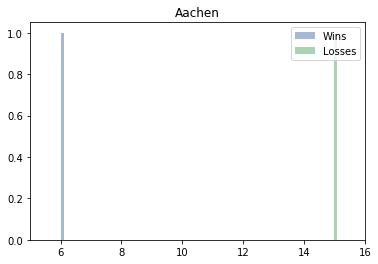

hist/figure2.jpeg


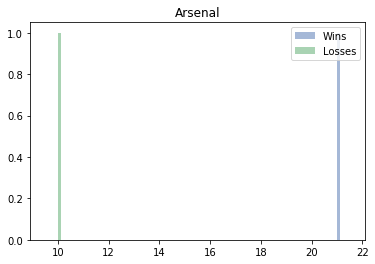

hist/figure3.jpeg


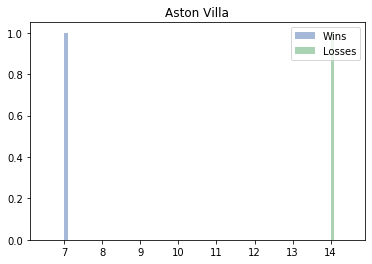

hist/figure4.jpeg


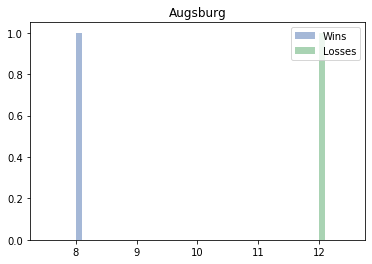

hist/figure5.jpeg


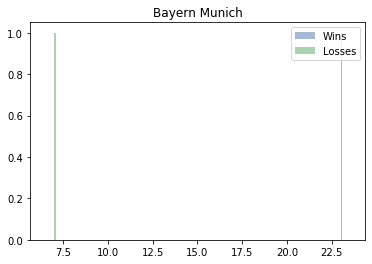

hist/figure6.jpeg


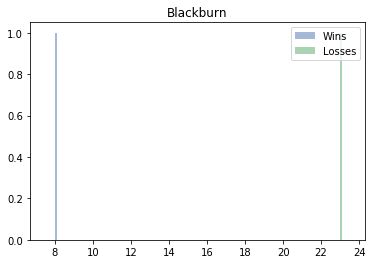

hist/figure7.jpeg


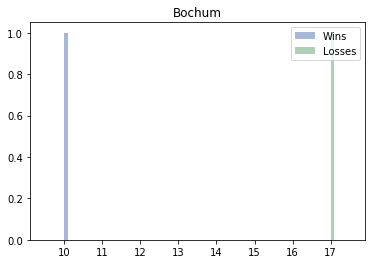

hist/figure8.jpeg


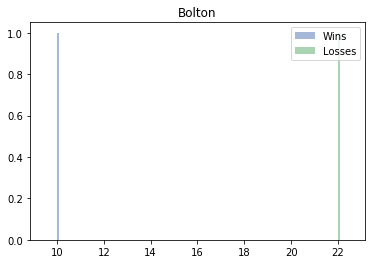

hist/figure9.jpeg


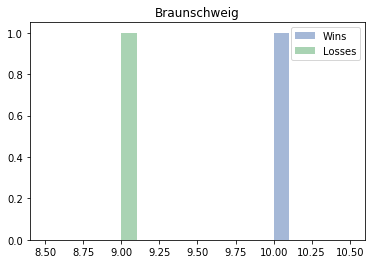

hist/figure10.jpeg


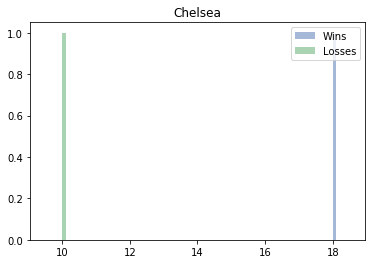

hist/figure11.jpeg


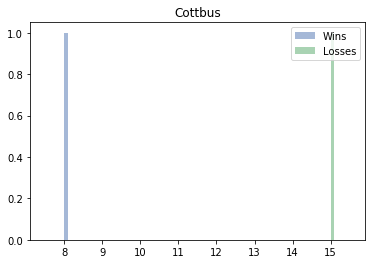

hist/figure12.jpeg


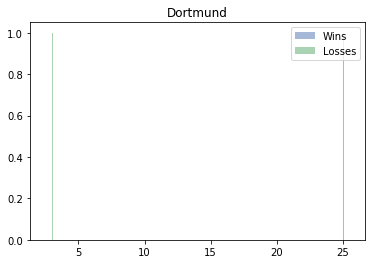

hist/figure13.jpeg


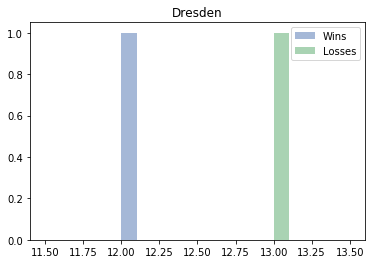

hist/figure14.jpeg


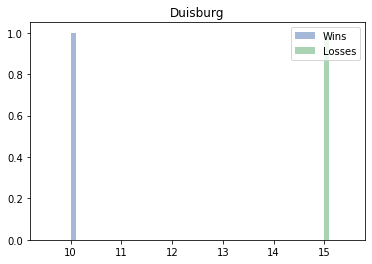

hist/figure15.jpeg


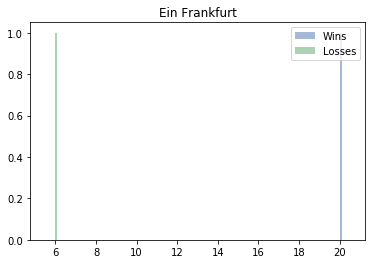

hist/figure16.jpeg


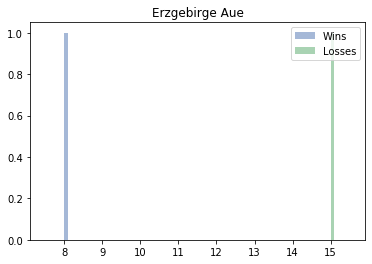

hist/figure17.jpeg


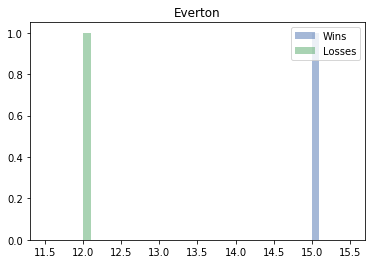

hist/figure18.jpeg


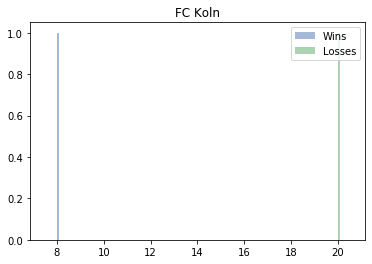

hist/figure19.jpeg


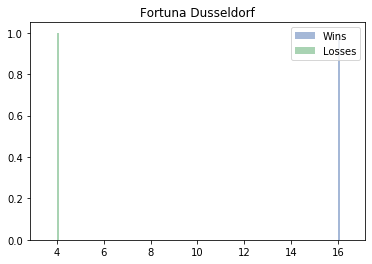

hist/figure20.jpeg


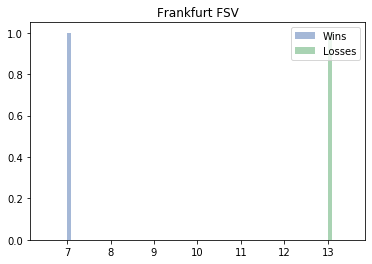

hist/figure21.jpeg


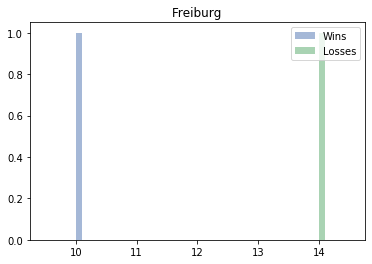

hist/figure22.jpeg


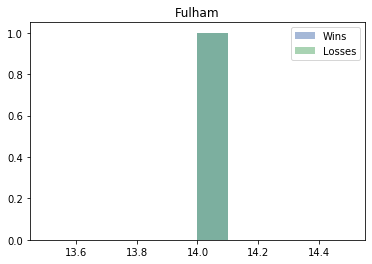

hist/figure23.jpeg


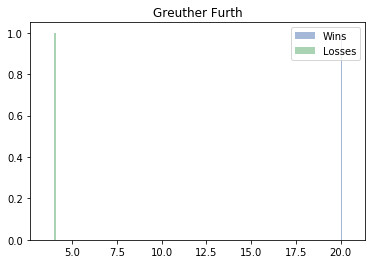

hist/figure24.jpeg


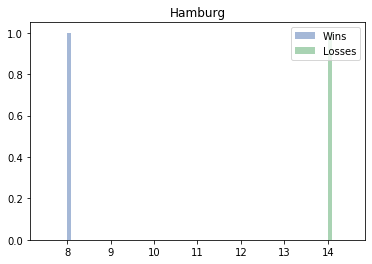

hist/figure25.jpeg


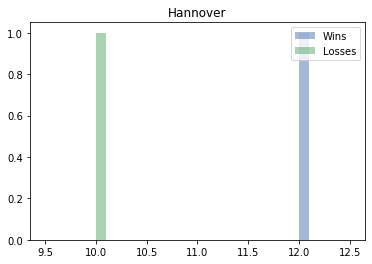

hist/figure26.jpeg


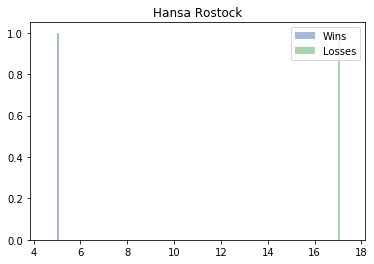

hist/figure27.jpeg


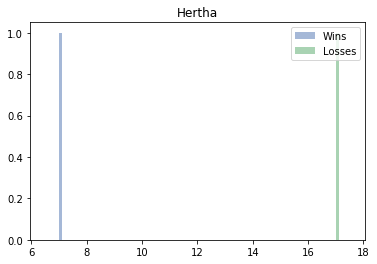

hist/figure28.jpeg


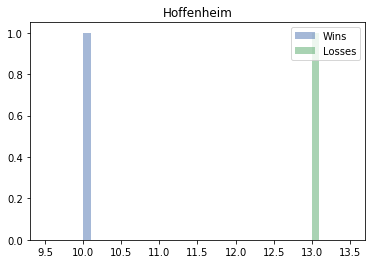

hist/figure29.jpeg


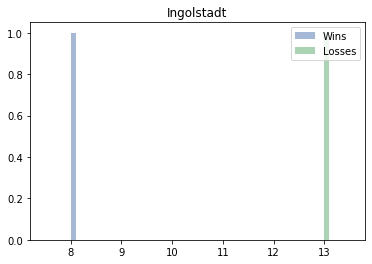

hist/figure30.jpeg


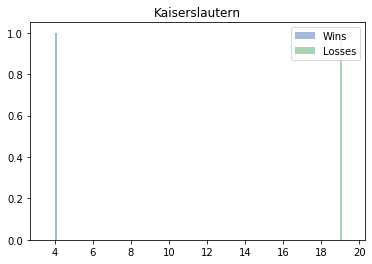

hist/figure31.jpeg


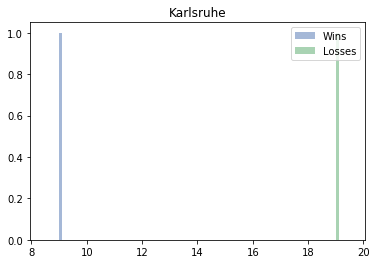

hist/figure32.jpeg


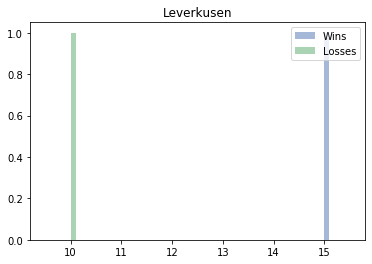

hist/figure33.jpeg


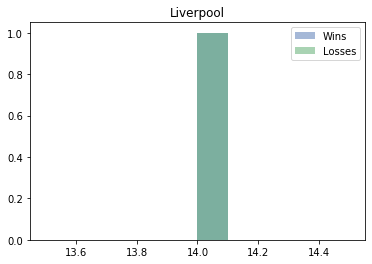

hist/figure34.jpeg


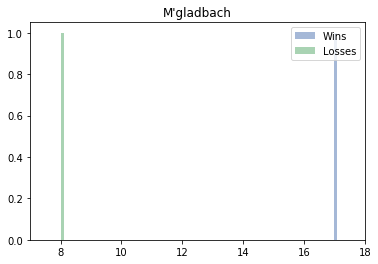

hist/figure35.jpeg


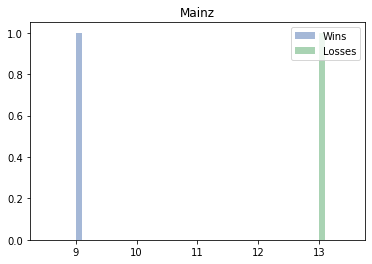

hist/figure36.jpeg


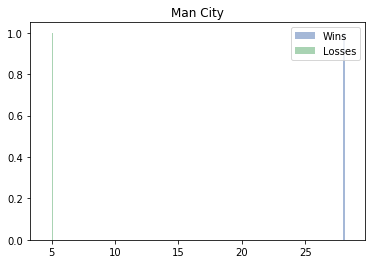

hist/figure37.jpeg


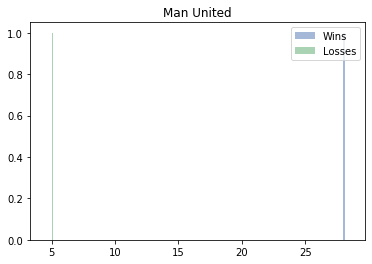

hist/figure38.jpeg


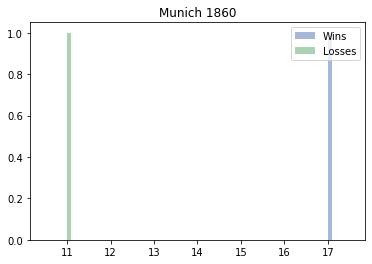

hist/figure39.jpeg


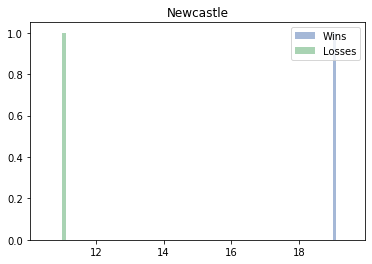

hist/figure40.jpeg


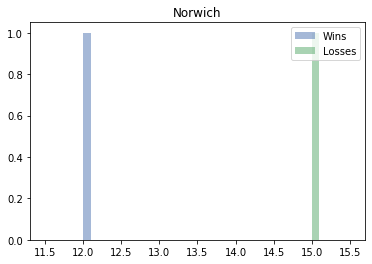

hist/figure41.jpeg


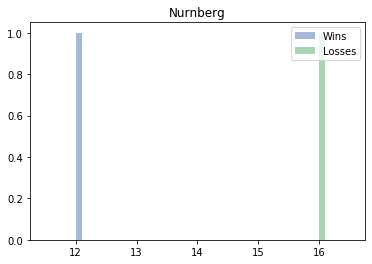

hist/figure42.jpeg


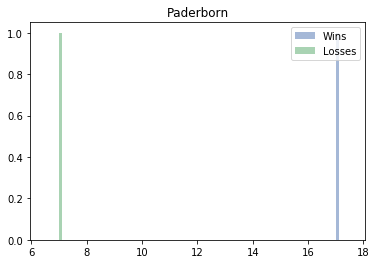

hist/figure43.jpeg


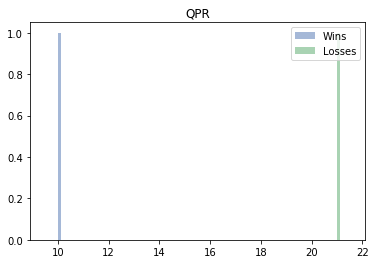

hist/figure44.jpeg


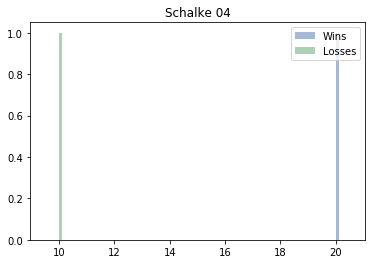

hist/figure45.jpeg


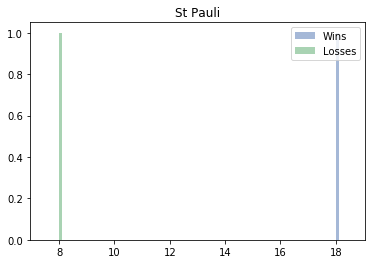

hist/figure46.jpeg


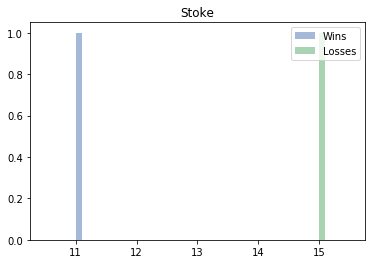

hist/figure47.jpeg


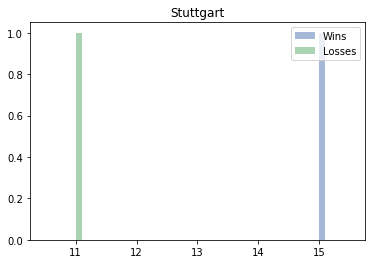

hist/figure48.jpeg


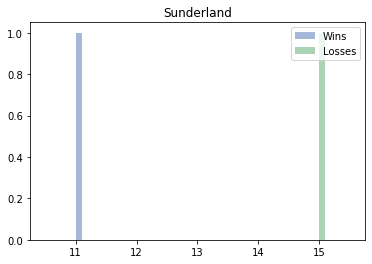

hist/figure49.jpeg


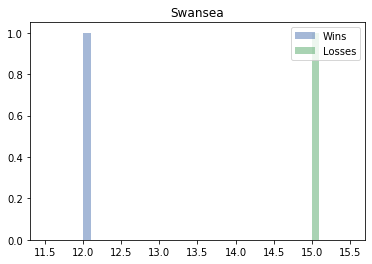

hist/figure50.jpeg


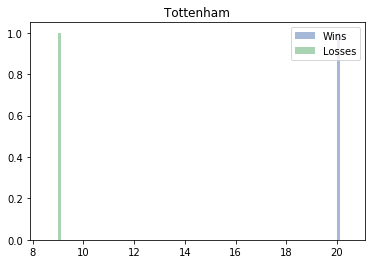

hist/figure51.jpeg


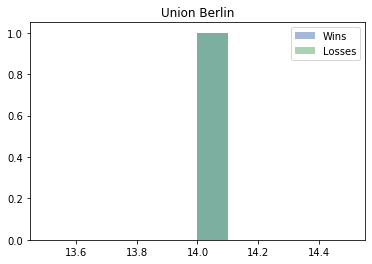

hist/figure52.jpeg


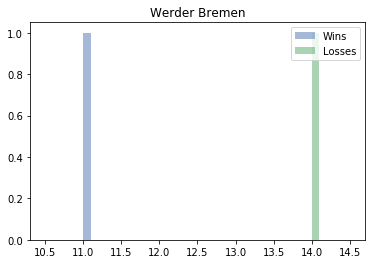

hist/figure53.jpeg


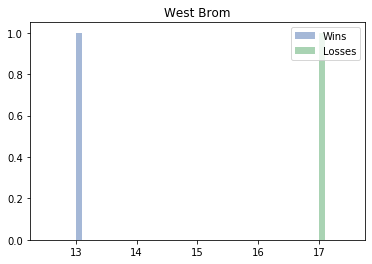

hist/figure54.jpeg


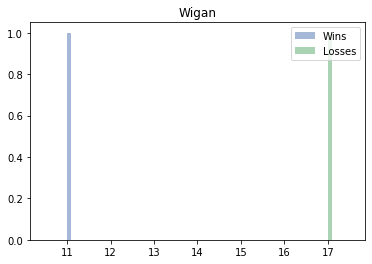

hist/figure55.jpeg


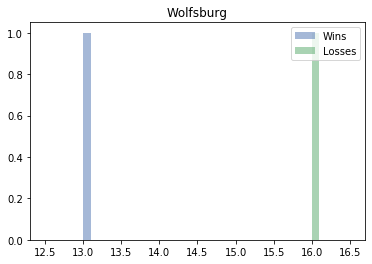

hist/figure56.jpeg


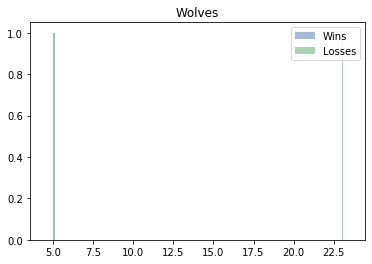

In [612]:
i = 1
for index, row in final_df.iterrows():
    
    x = row['Total_wins']
    y = row['Total_losses']
    
    plt.hist(x, alpha=0.5, label='Wins')
    plt.hist(y, alpha=0.5, label='Losses')
    plt.title(row.Teams)
    plt.legend(loc='upper right')
    location = f'hist/figure{i}.jpeg'
    print(location)
    plt.savefig(location)
    plt.show()
    i += 1

[Return to contents](#Table-of-contents)

### Mongo

In [624]:
import pymongo

In [648]:
from PIL import Image, ImageShow

In [625]:
myclient = pymongo.MongoClient(host='localhost', port=27017)

In [626]:
mydb = myclient['mod2_db']

In [627]:
mycollection = mydb['soccer']

In [628]:
final_df.head()

,Teams,Total_home_goals,Total_away_goals,Total_goals,Total_home_wins,Total_away_wins,Total_wins,rain_win_pct,Total_home_losses,Total_away_losses,Total_losses
0,Aachen,15,15,30,4,2,6,0.00,7.0,8,15.0
1,Arsenal,39,35,74,12,9,21,0.40,3.0,7,10.0
2,Aston Villa,20,17,37,4,3,7,0.00,8.0,6,14.0
3,Augsburg,20,16,36,6,2,8,0.25,4.0,8,12.0
4,Bayern Munich,49,28,77,14,9,23,1.00,2.0,5,7.0


In [629]:
final_df.drop(['Total_home_goals', 'Total_away_goals', 'Total_home_wins', 'Total_away_wins', 'Total_home_losses', 'Total_away_losses'], axis=1, inplace=True)

In [631]:
final_df.drop(['Total_losses'], axis=1, inplace=True)

In [632]:
final_df.head()

,Teams,Total_goals,Total_wins,rain_win_pct
0,Aachen,30,6,0.00
1,Arsenal,74,21,0.40
2,Aston Villa,37,7,0.00
3,Augsburg,36,8,0.25
4,Bayern Munich,77,23,1.00


In [639]:
def df_to_mongo(df = df):
    for index, row in df.iterrows():
        doc = dict(row) 
        mycollection.insert_one(doc)
        break

In [676]:
df_to_mongo(df = final_df)

In [635]:
list(mycollection.find({}))

[{'_id': ObjectId('5d03a888322862ab70f02db0'),
  'Teams': 'Aachen',
  'Total_goals': 30,
  'Total_wins': 6,
  'rain_win_pct': 0.0}]

In [651]:
location = 'hist/figure1.jpeg'

In [652]:
location

'hist/figure1.jpeg'

In [653]:
i = Image.open(location)

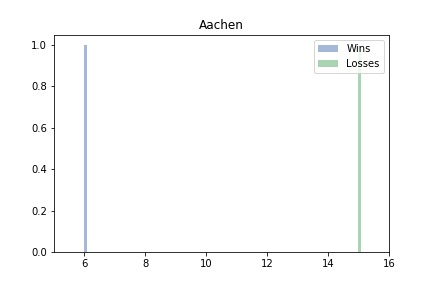

In [654]:
i

In [726]:
def image_to_mongo(df = df):
    i = 1
    for team in df.Teams:
        record_to_update = {'Teams': team}
        location = f'hist/figure{i}.jpeg' 
        update = {"$set": {'image': location}}
        mycollection.update_one(record_to_update, update)
        i += 1
        break
    

In [689]:
image_to_mongo(df = final_df)

1
Aachen
hist/figure1.jpeg


In [719]:
mycollection.delete_many({})

In [720]:
list(mycollection.find({}))

[]

In [721]:
class MongoHandler():
    
    def df_to_mongo(self, df = None):
        for index, row in df.iterrows():
            doc = dict(row) 
            mycollection.insert_one(doc)
    
    def image_to_mongo(self, df = None):
        i = 1
        for team in df.Teams:
            record_to_update = {'Teams': team}
            location = f'hist/figure{i}.jpeg' 
            update = {"$set": {'Hist': location}}
            mycollection.update_one(record_to_update, update)
            i += 1
    
    

In [722]:
to_mongo = MongoHandler()

In [723]:
to_mongo.df_to_mongo(df = final_df)

In [724]:
to_mongo.image_to_mongo(df = final_df)

In [725]:
list(mycollection.find({}))

[{'_id': ObjectId('5d03aecc322862ab70f02e5d'),
  'Teams': 'Aachen',
  'Total_goals': 30,
  'Total_wins': 6,
  'rain_win_pct': 0.0,
  'Hist': 'hist/figure1.jpeg'},
 {'_id': ObjectId('5d03aecc322862ab70f02e5e'),
  'Teams': 'Arsenal',
  'Total_goals': 74,
  'Total_wins': 21,
  'rain_win_pct': 0.4,
  'Hist': 'hist/figure2.jpeg'},
 {'_id': ObjectId('5d03aecc322862ab70f02e5f'),
  'Teams': 'Aston Villa',
  'Total_goals': 37,
  'Total_wins': 7,
  'rain_win_pct': 0.0,
  'Hist': 'hist/figure3.jpeg'},
 {'_id': ObjectId('5d03aecc322862ab70f02e60'),
  'Teams': 'Augsburg',
  'Total_goals': 36,
  'Total_wins': 8,
  'rain_win_pct': 0.25,
  'Hist': 'hist/figure4.jpeg'},
 {'_id': ObjectId('5d03aecc322862ab70f02e61'),
  'Teams': 'Bayern Munich',
  'Total_goals': 77,
  'Total_wins': 23,
  'rain_win_pct': 1.0,
  'Hist': 'hist/figure5.jpeg'},
 {'_id': ObjectId('5d03aecc322862ab70f02e62'),
  'Teams': 'Blackburn',
  'Total_goals': 48,
  'Total_wins': 8,
  'rain_win_pct': 0.4,
  'Hist': 'hist/figure6.jpeg'},
 

[Return to contents](#Table-of-contents)

# Summary

In this lab, we dug deep and used everything we've learned so far about python programming, databases, HTTP requests and API calls to ETL data from a SQL database into a MongoDB instance!